In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../Data/

/Users/cosmology/radiometer/MevJosCode/Data


In [3]:
import glob

In [4]:
fnames = glob.glob('*.txt')

In [6]:
#fnames = fnames[2:]

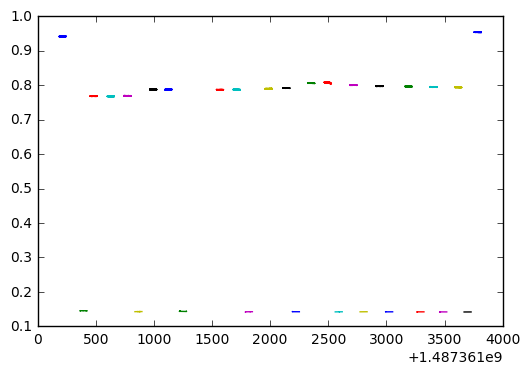

In [7]:
for f in fnames:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [8]:
nitrofiles = []
calibfiles = []
skyfiles = []

In [9]:
for f in fnames:
    x = np.loadtxt(f)
    if np.mean(x[:,1]) < 0.2:
        calibfiles.append(f)
    elif np.mean(x[:,1]) > 0.9:
        nitrofiles.append(f)
    else:
        skyfiles.append(f)

In [11]:
x = np.loadtxt(nitrofiles[0])
nitrodata = x[:,1]
nitrotemp = 77.2 #Kelvin

In [12]:
nitrodata = np.mean(nitrodata)

In [16]:
calibdata = []
calibtemp = []
calibtime = []
for f in calibfiles:
    x = np.loadtxt(f)
    calibtime.append(x[:,0])
    calibdata.append(x[:,1] * 10.)
    calibtemp.append(x[:,2])

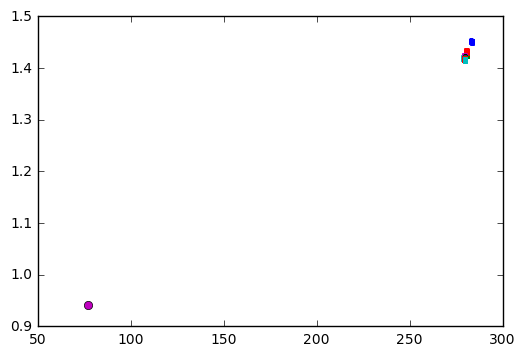

In [17]:
for k in range(11):
    plot(calibtemp[k], calibdata[k], '.')
plot(nitrotemp, nitrodata, 'o')

In [18]:
from scipy.optimize import curve_fit

In [19]:
tup = zip(calibtemp[0], calibdata[0])

In [20]:
x = sort(tup, axis=0)

In [23]:
xdata = [nitrotemp]
ydata = [nitrodata]

In [24]:
for k in range(len(calibfiles)):
    xdata.append(np.mean(calibtemp[k]))
    ydata.append(np.mean(calibdata[k]))

In [25]:
tup2 = zip(xdata, ydata)

In [27]:
z = sort(tup2, axis=0)

In [28]:
print z

[[  77.2           0.94170017]
 [ 279.03472175    1.41567454]
 [ 279.42568297    1.41724155]
 [ 279.42994941    1.41832209]
 [ 279.48523649    1.41864081]
 [ 279.61827993    1.41997133]
 [ 279.63224283    1.42037669]
 [ 279.77616554    1.42126138]
 [ 279.83070826    1.42330691]
 [ 280.76915683    1.4260371 ]
 [ 280.93453626    1.43225295]
 [ 283.32313659    1.45128331]]


In [29]:
xdata = z[:,0]
ydata = z[:,1]

In [31]:
def line(x, m, b):
    return m*x + b

In [32]:
popt = curve_fit(line, ydata, xdata)

In [33]:
popt

(array([ 419.23821591, -316.95323784]), array([[ 43.97811174, -60.85862915],
        [-60.85862915,  85.00388135]]))

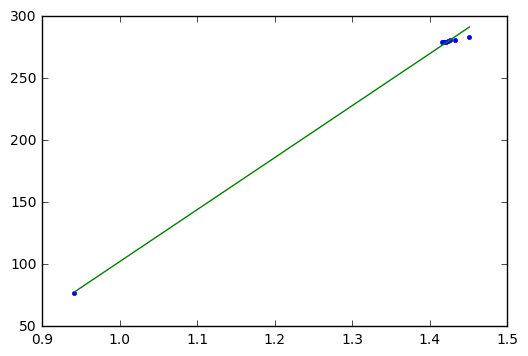

In [34]:
plot(ydata, xdata, '.')
plot(ydata, line(ydata, *popt[0]))

In [35]:
gain = popt[0][0]
trec = popt[0][1]

In [39]:
print gain
print trec

419.238215905
-316.95323784


In [40]:
x = np.loadtxt(skyfiles[0])

In [41]:
t = x[:,0]
skydata = x[:,1]

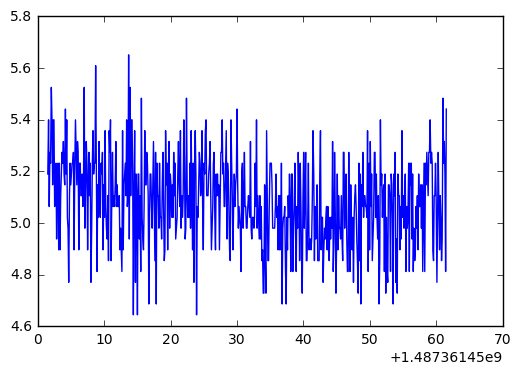

In [42]:
plot(t, line(skydata, *popt[0]))

In [45]:
skydata = []
skytime = []
for f in skyfiles:
    x = np.loadtxt(f)
    skytime.append(x[:,0])
    skydata.append(x[:,1])

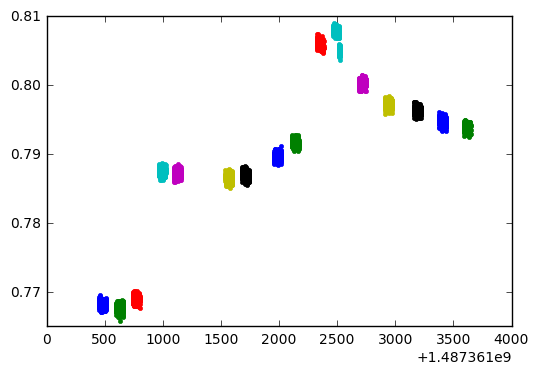

In [46]:
for k in range(len(skyfiles)):
    plot(skytime[k], skydata[k], '.')

In [47]:
angles = np.array([90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 50, 60, 70, 80, 90])

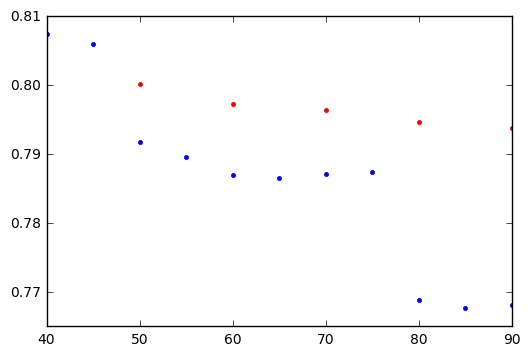

In [53]:
for k in range(len(skyfiles)):
    if k > 10:
        plot(angles[k], np.mean(skydata[k]), 'r.')
    else:
        plot(angles[k], np.mean(skydata[k]), 'b.')

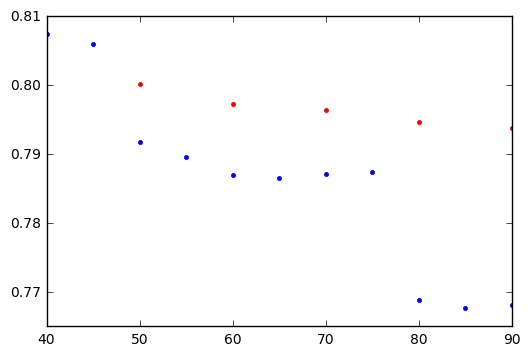

In [53]:
for k in range(len(skyfiles)):
    if k > 10:
        plot(angles[k], np.mean(skydata[k]), 'r.')
    else:
        plot(angles[k], np.mean(skydata[k]), 'b.')

In [56]:
xangles = np.sin(angles*np.pi/180.)

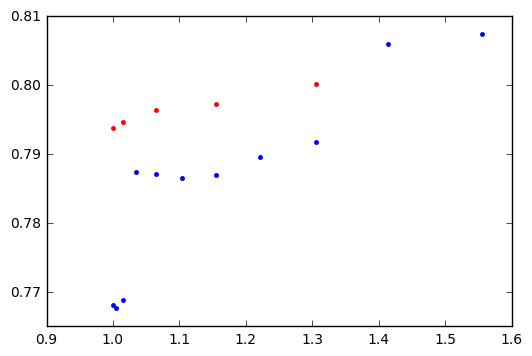

In [59]:
for k in range(len(skyfiles)):
    if k > 10:
        plot(1./xangles[k], np.mean(skydata[k]), 'r.')
    else:
        plot(1./xangles[k], np.mean(skydata[k]), 'b.')

In [58]:
np.sqrt(2)/2

0.70710678118654757

In [87]:
depth = 1./xangles[3:9]
bestdata = skydata[3:9]

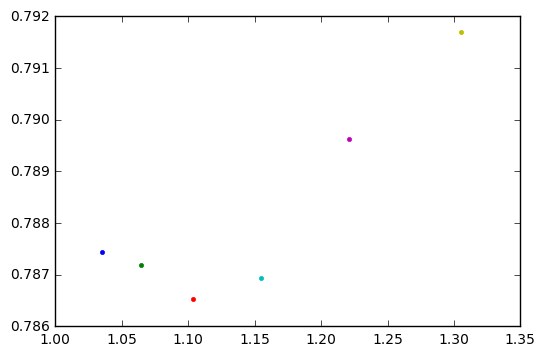

In [88]:
for k in range(len(bestdata)):
    plot(depth[k], np.mean(bestdata[k]), '.')

In [89]:
ydata = []
for k in range(len(bestdata)):
    ydata.append(np.mean(bestdata[k]))

In [90]:
popt = curve_fit(line, depth, ydata)

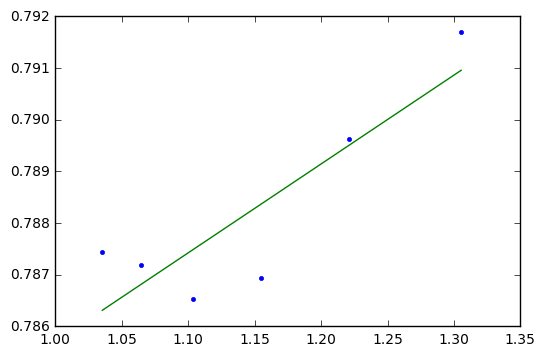

In [91]:
plot(depth, ydata, '.')
plot(depth, line(depth, *popt[0]))

In [92]:
P0 = line(0, *popt[0])

In [93]:
print P0 * gain + trec

5.23499195634
